# Shared k-mer content between samples

This notebook produces an upset plot that depicts the number of k-mers shared between sets of samples.
The absolute size of the intersection is the number of shared hashes (k-mers) in scaled FracMinHash sketches (e.g. 1/1000th of the total k-mers in the sample); see the README in this repository for more information about sketches, k-mers, and scaled values.

An upset plot is an alternative to a venn diagram; the bottom half of the plot shows which samples have shared content while the top half of the plot shows the size of the intersection between the specified samples.

This plot is good for visualizing the _exact_ sequencing content overlap between samples.
If there is a lot of variation in the samples, it might be difficult to interpret the plot as there may be many intersections.
Still, it provides a nice complement to the `sourmash compare` results and plots as it gives more information about the nature of the intersections between samples.

In [1]:
# the default directory is the "notebooks" folder; set it one level up.
setwd("..")

In [32]:
# adjust plot size rendered inline
options(repr.plot.width = 12, repr.plot.height = 5, repr.plot.res = 300)

In [4]:
library(readr)
library(dplyr)
library(purrr)
library(ggplot2)
library(ComplexUpset)

In [25]:
files <- Sys.glob("outputs/sourmash_sketch_csv/*k31*csv") # list files that contain k31 and end with .csv
sketches <- list()
for(i in 1:length(files)){
    sketch <- read_csv(files[i], show_col_types = F) # read in the hashes
    sketch_name <- colnames(sketch)   # record the signature name which is currently stored as the column name
    sketches[[i]] <- sketch[[1]]      # record the hash values in a list
    names(sketches)[i] <- sketch_name # set the name of the list index to the signature name
}

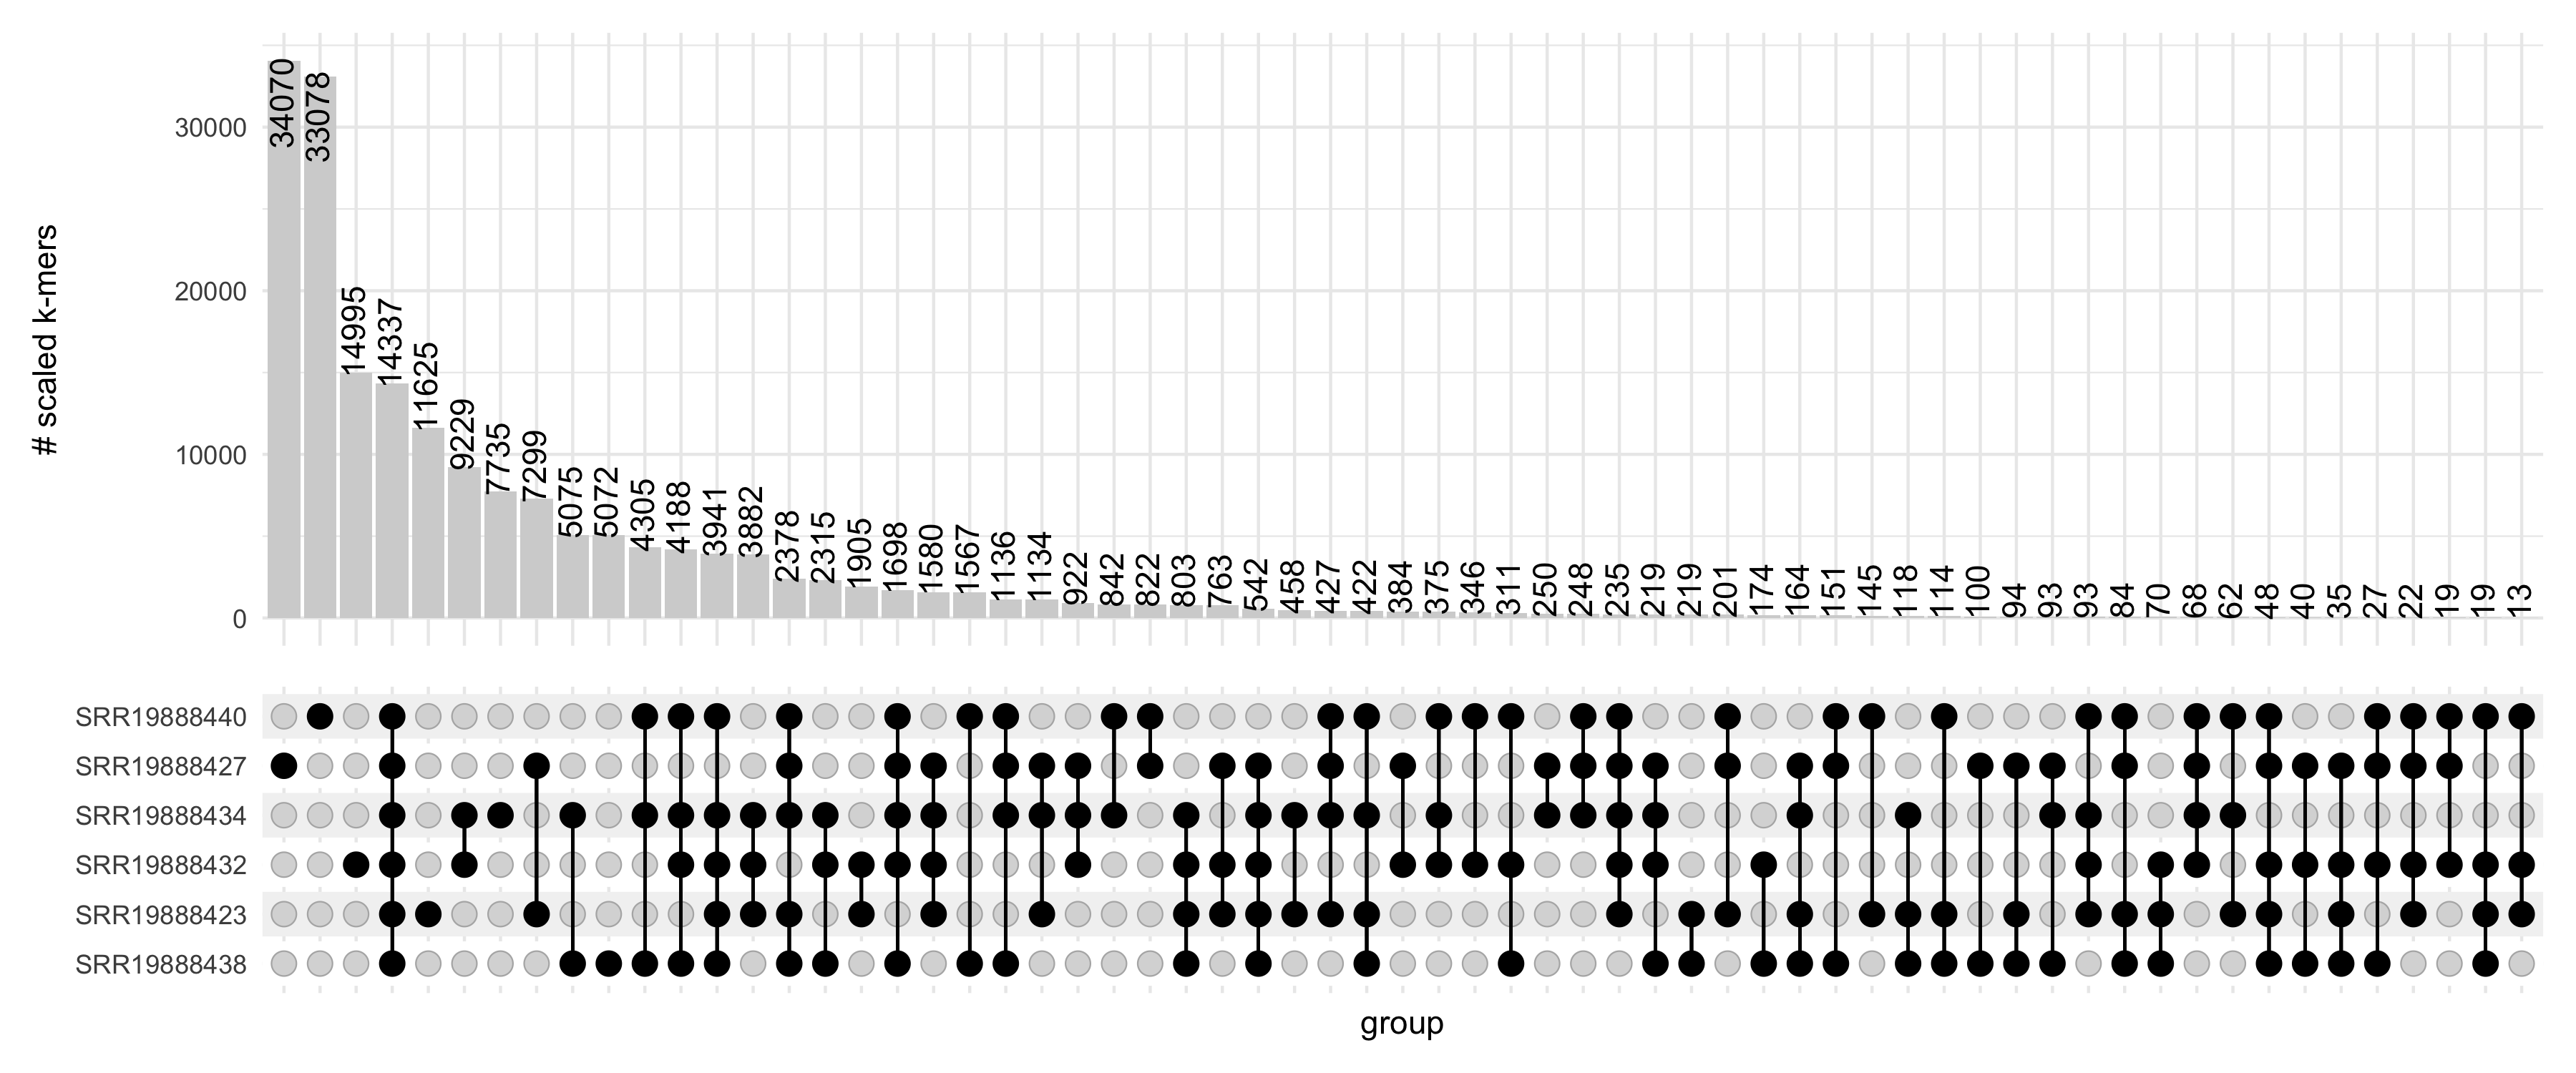

In [57]:
# plot the upset plot
upset(upset_list, intersect = names(sketches), set_sizes = F, 
      base_annotations=list(
          '# scaled k-mers'=intersection_size(text=list(vjust=0.4, hjust=.05, angle=90), 
                                                          text_colors=c(on_background='black', on_bar='black'),
                                                          mapping=aes(fill='bars_color')) + 
           scale_fill_manual(values=c('bars_color'='lightgrey'), guide='none'))
     )